<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Tarea_4_ML_Clustering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 4 : Clustering Model
## Transformación de Datos

In [ ]:
#iportamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importamos librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("gdrive/MyDrive/01 - Maestría Ciencia de Datos/MachineLearningUANL/ChurnDataSet.csv")
df.set_index('customerID', inplace = True)

def transform_float(x):
    try:
        x = float(x)
        return x
    except:
        return None
        
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: transform_float(x))
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].astype(float)

df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Codificamos la data

### One-Hot Encoding

In [ ]:
#codificamos variables categóricas
df_encode = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
                                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 
                                                     'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn'])
#Eliminamos columnas redudundantes correlaciones (+1 y -1), sólo nos quedaremos con 1 de ellas para evitar este problema
cat2del = ['OnlineSecurity_No internet service',
            'OnlineBackup_No internet service',
            'DeviceProtection_No internet service',
            'TechSupport_No internet service', 'StreamingTV_No internet service',
            'StreamingMovies_No internet service',
        'MultipleLines_No phone service','Churn_No', 'gender_Female','Dependents_No',
        'PhoneService_No', 'InternetService_No', 'PaperlessBilling_No', 'MultipleLines_No']

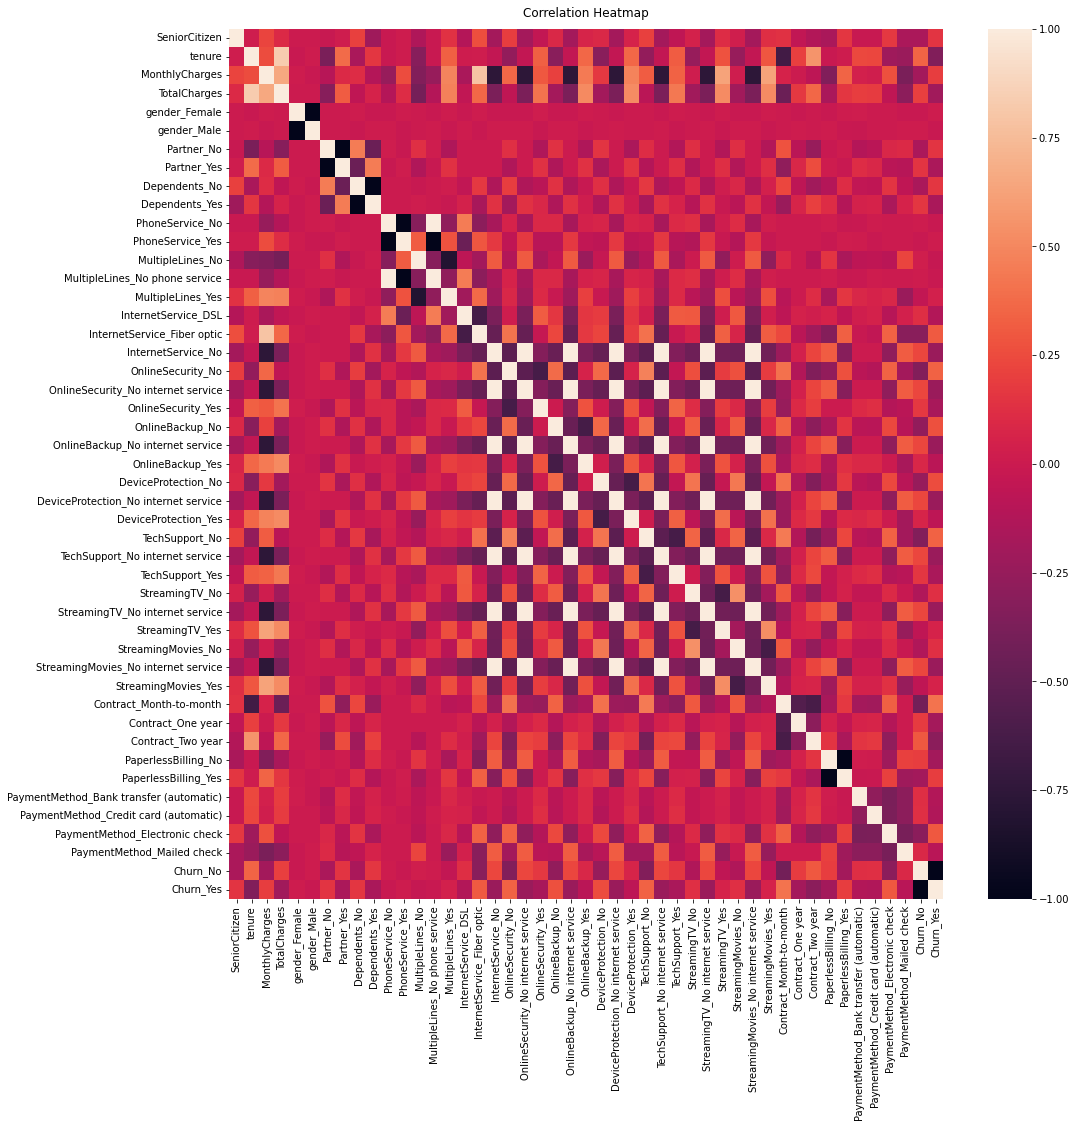

In [ ]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df_encode.corr().round(2), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

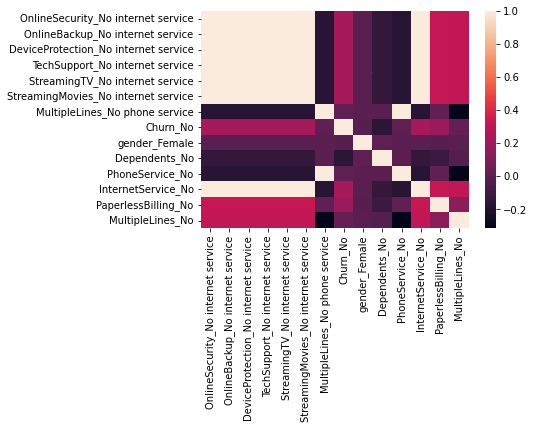

In [ ]:
sns.heatmap(df_encode[cat2del].corr())

como podemos observar en la matriz de correlación existen columnas **Redundantes** las cuales al codificar los valores de cada una nos dan valores de correlación igual a 1 y -1,  lo podemos ver en la gráfica como los colores blanco y negro.

guardaremos estos valores redundantes en una lista para desecharlos luego.

In [ ]:
print(df_encode.shape)
df_ = df_encode.drop(columns = cat2del)
print(df_.shape)
df_ = df_.dropna()

(7043, 47)
(7043, 33)


In [ ]:
X = df_.iloc[:,:-1]
y = df_.iloc[:,-1]

## Feature Selection



In [ ]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
            k_features=20, 
          forward=True,
          scoring =  'roc_auc',  # The metric to use to evaluate the classifier is accuracy 
          cv = 5)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
sfs = sfs.fit(X,y)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

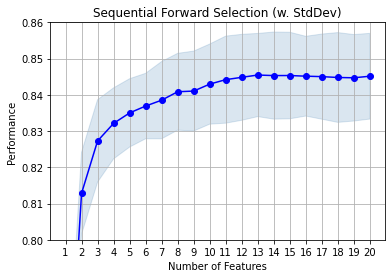

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 0.86])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
tab = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
tab.head(14)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.750808868826066, 0.7384881788674283, 0.7284...",0.741415,"(tenure,)",0.012881,0.010022,0.005011
2,"(1, 11)","[0.8182219380755911, 0.8319636487878614, 0.799...",0.812836,"(tenure, InternetService_Fiber optic)",0.014559,0.011327,0.005664
3,"(1, 11, 24)","[0.8333497264082083, 0.8457778341469475, 0.814...",0.827281,"(tenure, InternetService_Fiber optic, Contract...",0.014623,0.011377,0.005688
4,"(1, 11, 12, 24)","[0.8428231980990935, 0.8446687132126458, 0.821...",0.832125,"(tenure, InternetService_Fiber optic, OnlineSe...",0.012594,0.009799,0.004899
5,"(1, 11, 12, 24, 30)","[0.8474395742632175, 0.845525467073215, 0.8259...",0.835016,"(tenure, InternetService_Fiber optic, OnlineSe...",0.012122,0.009431,0.004715
6,"(1, 11, 12, 24, 27, 30)","[0.8476233492604999, 0.8482704443213526, 0.828...",0.836909,"(tenure, InternetService_Fiber optic, OnlineSe...",0.011603,0.009027,0.004514
7,"(1, 11, 12, 18, 24, 27, 30)","[0.8517324028969151, 0.8513519110011338, 0.830...",0.838531,"(tenure, InternetService_Fiber optic, OnlineSe...",0.0137,0.010659,0.005329
8,"(1, 3, 11, 12, 18, 24, 27, 30)","[0.8530473000605683, 0.8544993813771219, 0.830...",0.840854,"(tenure, TotalCharges, InternetService_Fiber o...",0.013621,0.010598,0.005299
9,"(1, 3, 11, 12, 18, 20, 24, 27, 30)","[0.8546598609522132, 0.8544269067303064, 0.832...",0.84104,"(tenure, TotalCharges, InternetService_Fiber o...",0.014171,0.011026,0.005513
10,"(1, 3, 8, 11, 12, 18, 20, 24, 27, 30)","[0.8558738112863733, 0.8568625725393563, 0.831...",0.84296,"(tenure, TotalCharges, PhoneService_Yes, Inter...",0.014205,0.011052,0.005526


### Discusión de Resultados

De acuerdo con Celik, los métodos para la selección de características más utilizados son los de selección de características secuenciales. En este ejercicio se utilizó un algoritmo de propagación hacia adelante, el cual permite agregar una nueva variable cada iteración.

la métrica utilizada para este análisis es la métrica roc_auc, la cual es comúnmente utilizada en análisis de dos clases, junto con un algoritmo de regresión logística el cual es utilizado para problemas de clasificación y retención de clientes (Fridrich, 2022).
Es de esperar que dentro de las variables más importantes la que tiene mayor participación es la variable de antigüedad, la cual puede explicar muy bien el modelo, por otro lado si el cliente cuenta con fibra óptica nos habla de la calidad del servicio. considero que el tema de un contrato de pago mes a mes permite al cliente poder amortizar el gasto comparado de un pago anual.
la cantidad de variables más representativas para el modelo considero que son hasta 12 las cuales son las siguientes:

```
 'tenure',
 'TotalCharges',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_Yes',
 'TechSupport_No',
 'StreamingTV_No',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check'
```

# Utilizando Algoritmo de Clasificación
En la siguiente sección trabajaremos con 2 modelos de Clasificación No supervisado  (K mediods y K means), con estos dos algortimos calcularemos métricas para ver cual tiene mejores resultados al momento de generar una etiqueta de Churn

In [ ]:
usecols = ['tenure',
            'TotalCharges',
            'PhoneService_Yes',
            'MultipleLines_Yes',
            'InternetService_Fiber optic',
            'OnlineSecurity_No',
            'OnlineBackup_Yes',
            'TechSupport_No',
            'StreamingTV_No',
            'Contract_Month-to-month',
            'Contract_Two year',
            'PaperlessBilling_Yes',
            'PaymentMethod_Electronic check']

In [ ]:
X = df_[usecols].copy()
y = df_.Churn_Yes.copy()

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
label_kMedoids = kmedoids.labels_

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
label_KMeans = kmeans.labels_

In [ ]:
tab_exp_kmed = pd.DataFrame({'predict' : label_kMedoids, 'Churn':y })
tab_exp_kmed['model'] = 'KMedoids'
tab_exp_NNC = pd.DataFrame({'predict' : label_KMeans, 'Churn':y })
tab_exp_NNC['model'] = 'kMeans'
results = pd.concat([tab_exp_kmed, tab_exp_NNC], axis = 0, ignore_index = True)
results['predict'] = np.where(results['predict'] == 1, 0, 1)

In [ ]:
results['label'] = np.where(
    results.Churn == results.predict,
    np.where(
        results.Churn  == 1, 'TP', 'TN'
        ),
        np.where(
            results.Churn  == 1, 'FP', 'FN'
            )
        )

In [ ]:
tab_metrics = results.groupby(['model']).label.value_counts().unstack(1).fillna(0)

In [ ]:
 results.groupby(['model']).predict.value_counts()

model     predict
KMedoids  1          4730
          0          2302
kMeans    0          4942
          1          2090
Name: predict, dtype: int64

In [ ]:
def metrics_(df):
    accuracy = (df['TP']+ df['TN'] )/(df['TP']+ df['TN'] + df['FP']+ df['FN']) 
    precision = (df['TP'] )/(df['TP'] + df['FP']) 
    recall =  (df['TP'] )/(df['TP'] + df['FN']) 
    f1_score = 2 / (1/ recall + 1/ precision)
    return {'accuracy':[accuracy], 'precision' : [precision],'recall' : [recall], 'f1_score':[f1_score]}

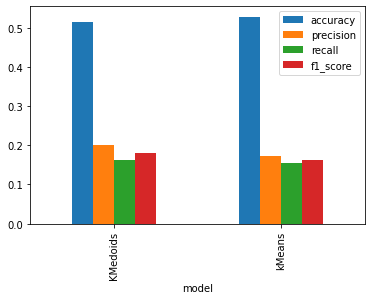

In [ ]:
res = pd.concat(
            [pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[0, :])), 
            pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[1, :]))],
            axis = 0)
res.index = tab_metrics.index
res.plot(kind = 'bar')

In [ ]:
res.round(2)

,accuracy,precision,recall,f1_score
model,,,,
KMedoids,0.51,0.20,0.16,0.18
kMeans,0.53,0.17,0.15,0.16


In [ ]:
res_all.round(2)

,accuracy,precision,recall,f1_score
model,,,,
KMedoids,0.51,0.20,0.16,0.18
kMeans,0.53,0.17,0.15,0.16


Al implementar ambos modelos observamos lo siguiente:

El clasificador de KMedoids tiene un mejor accuracy, 51% contra el 47% del KMeans, sin embargo al revisar los demás indicadores podemos ver que existe evidencia de que el modelo de KMeans es mejor al no arrojar tantos falsos positivos (error tipo II).

In [ ]:
res_all = res.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2).fit(X)
label_AgC = agc.labels_

## Referencias

Çelik, Özer. (2020). Examination of Feature Selection Methods and an Application. American Journal of Engineering Research, 9(4), 33-40. link:
https://www.researchgate.net/publication/341988460_Examination_of_Feature_Selection_Methods_and_an_Application

Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874. link: https://www.sciencedirect.com/science/article/abs/pii/S016786550500303X


Fridrich, Martin & Dostal, Petr. (2022). User churn model in e-commerce retail.cientific Papers of the Universityof Pardubice, 30(1) 1-12. link:
https://www.researchgate.net/publication/359739936_User_churn_model_in_e-commerce_retail


